In [1]:
from google.colab import files
uploaded = files.upload()

Saving raw_analyst_ratings.csv to raw_analyst_ratings.csv


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


<Axes: xlabel='publisher'>

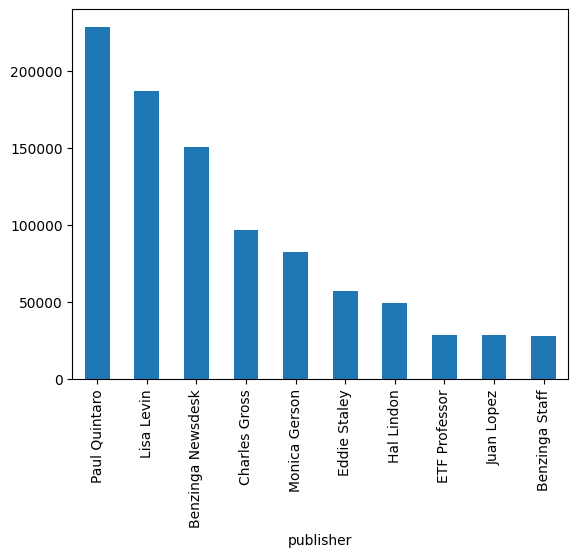

In [2]:
import pandas as pd
df = pd.read_csv('raw_analyst_ratings.csv')
df['headline_length'] = df['headline'].str.len()
print(df['headline_length'].describe())
df['publisher'].value_counts().head(10).plot(kind='bar')


In [5]:
pd.to_datetime(df['date'], errors='coerce')  # Good default
df.set_index('date').resample('D').size().plot(title='News Count Per Day')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['headline'])

# Show top keywords
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)
print(sorted_words[:10])


[('vs', np.int64(162099)), ('stocks', np.int64(161776)), ('est', np.int64(140604)), ('eps', np.int64(128897)), ('market', np.int64(120558)), ('shares', np.int64(114313)), ('reports', np.int64(108710)), ('update', np.int64(91723)), ('earnings', np.int64(87399)), ('sales', np.int64(79645))]


In [7]:
# Time of day analysis
df['hour'] = df['date'].dt.hour
df['hour'].value_counts().sort_index().plot(kind='bar', title='Publishing Hours')

# Domain extraction from publishers
df['domain'] = df['publisher'].str.extract(r'@([\w\.-]+)')
df['domain'].value_counts().head(10).plot(kind='bar')


AttributeError: Can only use .dt accessor with datetimelike values